In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import seaborn
import numpy as np

%matplotlib inline

seaborn.set_context('notebook', font_scale=1.4)

data = pd.read_csv('gapminder_all.csv', index_col='country')
data = data.drop(data.gdpPercap_1957.argmax())

In [2]:
def scientific_notation(value, precision=1):
    order = int(np.log10(value))
    digits = round(value / 10**order, precision)
    if precision == 0:
        digits = int(digits)
    return str(digits) + "e" + str(order)

assert scientific_notation(26.69, 2) == '2.67e1'

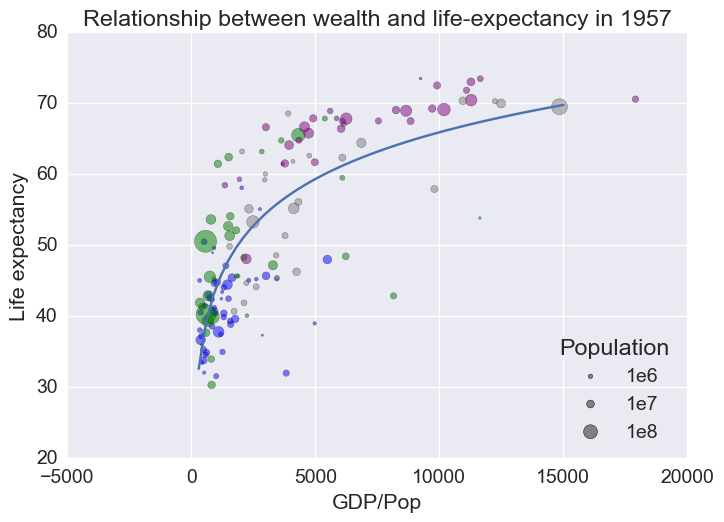

In [6]:
fig, ax = plt.subplots()

for continent in data.continent.unique():
    d = data[data.continent == continent]
    if continent == 'Africa':
        color = 'blue'
    elif continent == 'Asia':
        color = 'green'
    elif continent == 'Europe':
        color = 'purple'
    else:
        color = 'grey'
    ax.scatter(d.gdpPercap_1957, d.lifeExp_1957,
               s=np.sqrt(d.pop_1957 / 1e4),
               c=color, alpha=0.5)

marks = []
labels = []
for pop in np.logspace(6, 8, num=3):
    marks.append(ax.scatter([], [],
                 c='grey',
                 s=np.sqrt(pop / 1e4),
                 label=pop))
    labels.append(scientific_notation(pop, precision=0))

fit = sm.OLS.from_formula('lifeExp_1957 ~ np.log(gdpPercap_1957)', data=data).fit()
xx = np.linspace(300, 15000)
ax.plot(xx, fit.params[0] + fit.params[1] * np.log(xx))


ax.legend(marks, labels, loc='lower right', title='Population')
ax.set_xlabel('GDP/Pop')
ax.set_ylabel('Life expectancy')
ax.set_title('Relationship between wealth and life-expectancy in 1957')

In [4]:
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           lifeExp_1957   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     222.6
Date:                Wed, 14 Dec 2016   Prob (F-statistic):           1.19e-30
Time:                        16:33:23   Log-Likelihood:                -485.58
No. Observations:                 141   AIC:                             975.2
Df Residuals:                     139   BIC:                             981.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                -21.5287      4.934     -4.363      0.000     -31.284     -11.773
np.log(gdpPercap_1957)     9.4916      0.636     14.920      0.000       8.234      10.749
==============================================================================
Omnibus:                        7.022   Durbin-Watson:                   1.327
Prob(Omnibus):                  0.030   Jarque-Bera (JB):                6.786
Skew:                          -0.528   Prob(JB):                       0.0336
Kurtosis:                       3.195   Cond. No.                         60.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""